
# Project:  Investigate European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I investigate The ultimate Soccer database that comes from Kaggle It contains data for soccer matches of 11 European Countries from 2008 to 2016 also consists 
(+25,000 matches , +10,000 players , Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) )

I'm tring to find out:
1-What teams improved the most over the time period? 
2-Which players had the most penalties?
3-What team attributes lead to the most victories?


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


<a id='wrangling'></a>
## Data Wrangling


### Data Gathering

In [2]:
database = sqlite3.connect('database.sqlite')


country = pd.read_sql('select * from Country', database)
league = pd.read_sql('select * from League', database)
player = pd.read_sql('select * from Player', database)
player_att = pd.read_sql('select * from Player_Attributes', database)
team = pd.read_sql('select * from Team', database)
team_att = pd.read_sql('select * from Team_Attributes', database)
match = pd.read_sql('select * from Match', database)

### Data Assessing

In [3]:
country.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [4]:
league.head(3)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


In [5]:
team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [6]:
match.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [7]:
player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [8]:
country.shape

(11, 2)

In [9]:
league.shape  

(11, 3)

In [10]:
team.shape

(299, 5)

In [11]:
match.shape

(25979, 115)

In [12]:
#country.info()
#league.info()
#team.info()
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [13]:
match.duplicated().sum()

0

In [14]:
team.duplicated().sum()

0

In [15]:
player.duplicated().sum()

0

In [16]:
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [17]:
player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [18]:
match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

### Data Cleaning

In [19]:
country1 = country.copy()
league1 = league.copy()
player1 = player.copy()
player_att1 = player_att.copy()
team1 = team.copy()
team_att1 = team_att.copy()
match1 = match.copy()

In [20]:
match1['date'] = pd.to_datetime(match1['date'])
match1['date'].dtypes

dtype('<M8[ns]')

In [21]:
team1.dropna(axis='rows', inplace=True)

In [22]:
match1.dropna(axis='columns', inplace=True)

In [23]:
season_starting = match1['season'].apply(lambda x: x.split("/")[0])
season_ending = match1['season'].apply(lambda x: x.split("/")[1])

match1['season_starting'] = season_starting
match1['season_ending'] = season_ending

In [24]:
match1.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_starting,season_ending
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,2009


In [25]:
country1.head(1)

,id,name
0,1,Belgium


In [27]:
country1.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

match1 = match1.merge(country1, how='inner', left_on='country_id', right_on='country_id')

match1.drop(columns=['country_id'], inplace=True)

match1.head()

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_starting,season_ending,country_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium
1,2,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,2009,Belgium
2,3,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,2009,Belgium
3,4,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,2009,Belgium
4,5,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,2009,Belgium


In [28]:
league1.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [29]:
league1.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

match1 = match1.merge(league1, how='inner', left_on='league_id', right_on='league_id')

match1.drop(columns=['league_id', 'country_id'], inplace=True)

match1.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_starting,season_ending,country_name,league_name
0,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium,Belgium Jupiler League
1,2,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,2009,Belgium,Belgium Jupiler League
2,3,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,2009,Belgium,Belgium Jupiler League
3,4,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,2009,Belgium,Belgium Jupiler League
4,5,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,2009,Belgium,Belgium Jupiler League


In [30]:
team1.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [31]:
team1.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id' ], axis=1, inplace=True)

team1.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [32]:
match1 = match1.merge(team1, how='inner', left_on='home_team_api_id', right_on='team_api_id')

match1.rename(columns={'team_long_name': 'home_team'}, inplace=True)

match1.drop(columns=['home_team_api_id', 'team_api_id'], axis=1, inplace=True)

match1 = match1.merge(team, how='left', left_on='away_team_api_id', right_on='team_api_id')

match1.rename(columns={'team_long_name': 'away_team'}, inplace=True)

match1.drop(columns=['team_api_id', 'away_team_api_id'], axis=1, inplace=True)

match1.head()

,id_x,season,stage,date,match_api_id,home_team_goal,away_team_goal,season_starting,season_ending,country_name,league_name,home_team,id_y,team_fifa_api_id,away_team,team_short_name
0,1,2008/2009,1,2008-08-17,492473,1,1,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,2,675.0,Beerschot AC,BAC
1,29,2008/2009,12,2008-11-15,492583,1,1,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,13,546.0,KSV Roeselare,ROS
2,47,2008/2009,14,2008-11-29,492651,3,2,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,5,1750.0,KSV Cercle Brugge,CEB
3,65,2008/2009,16,2008-12-13,492713,1,0,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,18,670.0,Sporting Charleroi,CHA
4,94,2008/2009,19,2009-01-24,492805,2,0,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,8,1747.0,RAEC Mons,MON


In [33]:
def winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team = row[2]
    away_team = row[3]
    
    if home_score > away_score:
        return home_team
    elif home_score < away_score:
        return away_team
    else:
        return 'Tie'

match1['winner']  = match1[['home_team_goal', 'away_team_goal', 'home_team', 'away_team']].apply(winner, axis=1)

match1.head(2)

,id_x,season,stage,date,match_api_id,home_team_goal,away_team_goal,season_starting,season_ending,country_name,league_name,home_team,id_y,team_fifa_api_id,away_team,team_short_name,winner
0,1,2008/2009,1,2008-08-17,492473,1,1,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,2,675.0,Beerschot AC,BAC,Tie
1,29,2008/2009,12,2008-11-15,492583,1,1,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,13,546.0,KSV Roeselare,ROS,Tie


In [34]:
match1.to_csv('matches.csv', index=False)

In [35]:
team_att1 = team_att1.merge(team1, left_on='team_api_id', right_on='team_api_id')

team_att1.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau


In [36]:
team_att1['date'] = pd.to_datetime(team_att1['date'])
team_att1['season'] = team_att1['date'].dt.year

team_att1['season'].dtype

dtype('int64')

In [37]:
team_att1.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,season
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,2010
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,2014


In [38]:
team_att1.to_csv('teams', index=False)

In [39]:
player_att1 = player_att1.merge(player1, left_on='player_api_id', right_on='player_api_id')

player_att1.head(2)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [40]:
player_att1.rename(columns={'id_x': 'id'}, inplace=True)
player_att1.drop(columns=['id_y', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace=True)

player_att1.head(2)

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


In [41]:
player_att1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 45 columns):
id                     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [42]:
player_att1.to_csv('players.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1 : What teams improved the most over the time period?

#### Which team had the most victories in 2013/2014 season?

In [43]:
thematchs = pd.read_csv('matches.csv')
thematchs.head(2)

,id_x,season,stage,date,match_api_id,home_team_goal,away_team_goal,season_starting,season_ending,country_name,league_name,home_team,id_y,team_fifa_api_id,away_team,team_short_name,winner
0,1,2008/2009,1,2008-08-17,492473,1,1,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,2,675.0,Beerschot AC,BAC,Tie
1,29,2008/2009,12,2008-11-15,492583,1,1,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,13,546.0,KSV Roeselare,ROS,Tie


In [44]:
homewin = thematchs.query('season_starting == 2013 and season_ending == 2014 and home_team == winner')\
.groupby(['home_team',  'winner']).count()['id_x'].sort_values(ascending=False)[:5]

homewin

home_team        winner         
Juventus         Juventus           19
Manchester City  Manchester City    17
Liverpool        Liverpool          16
Celtic           Celtic             16
FC Barcelona     FC Barcelona       16
Name: id_x, dtype: int64

In [45]:
awaywin = thematchs.query('season_starting == 2013 and season_ending == 2014 and away_team == winner')\
.groupby(['away_team',  'winner']).count()['id_x'].sort_values(ascending=False)[:5]

awaywin

away_team            winner             
Celtic               Celtic                 15
FC Bayern Munich     FC Bayern Munich       14
Juventus             Juventus               14
Atlético Madrid      Atlético Madrid        13
Paris Saint-Germain  Paris Saint-Germain    12
Name: id_x, dtype: int64

In [46]:
seasonwin = thematchs.query('season_starting == 2013 and season_ending == 2014')

totalwin = seasonwin.groupby('winner')['id_x'].count().sort_values(ascending=False)[1:6]

totalwin

winner
Juventus               33
Celtic                 31
FC Bayern Munich       29
Atlético Madrid        28
Paris Saint-Germain    27
Name: id_x, dtype: int64

### Question 2: Which players had the most penalties?
#### Which players had the most penalties  ?

In [47]:
player_att1['penalties'][:10]

0    48.0
1    48.0
2    48.0
3    47.0
4    47.0
5    59.0
6    59.0
7    59.0
8    59.0
9    59.0
Name: penalties, dtype: float64

In [48]:
toppenalties = player_att1.groupby(['player_api_id', 'player_name'])['penalties'].sum().sort_values(ascending=False)[:5]

toppenalties

player_api_id  player_name       
41269          Alessio Cerci         4314.0
108808         Mario Balotelli       4120.0
41890          Claudio Marchisio     3984.0
26472          Michael Bradley       3813.0
25772          Zdravko Kuzmanovic    3799.0
Name: penalties, dtype: float64

Text(0,0.5,'score')

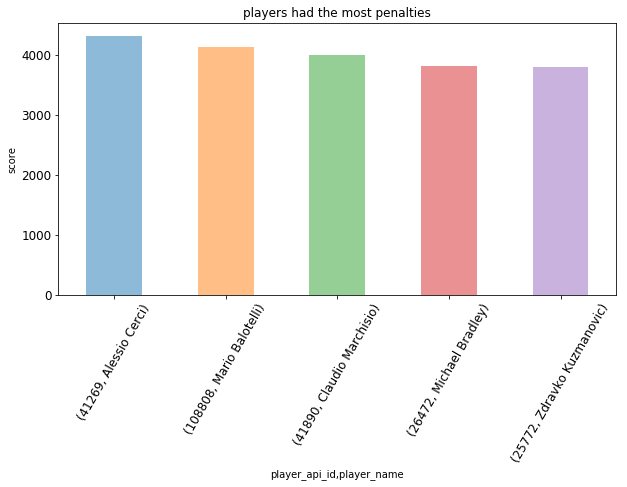

In [49]:
ax = toppenalties.plot(kind="bar", title="players had the most penalties", figsize=(10,5),alpha=0.5,fontsize=12, rot=60)

ax.set_ylabel("score")

### Question 3:  What team attributes lead to the most victories?
#### What team attributes lead to the most victories in 2013/2014 season ?

In [50]:
dfseason = thematchs.query('season_starting == 2013 and season_ending == 2014')

topwinners = dfseason.groupby('winner')['id_x'].count().sort_values(ascending=False)

In [51]:
topwinners[1:6]

winner
Juventus               33
Celtic                 31
FC Bayern Munich       29
Atlético Madrid        28
Paris Saint-Germain    27
Name: id_x, dtype: int64

In [53]:
winners = topwinners[1:6].index

In [57]:
attributes = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayPassing',\
           'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',\
           'defencePressure', 'defenceAggression', 'defenceTeamWidth']

In [58]:
winners_stats = team_att1.query('(season == 2013) and team_long_name in @winners')[attributes]

In [59]:
winners_stats

,team_long_name,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
97,Atlético Madrid,47,51,70,65,54,52,37,55
145,FC Bayern Munich,56,41,40,44,39,52,54,52
291,Celtic,50,53,57,58,60,55,51,60
627,Juventus,39,33,51,63,72,66,67,36
964,Paris Saint-Germain,49,41,62,52,60,49,46,52


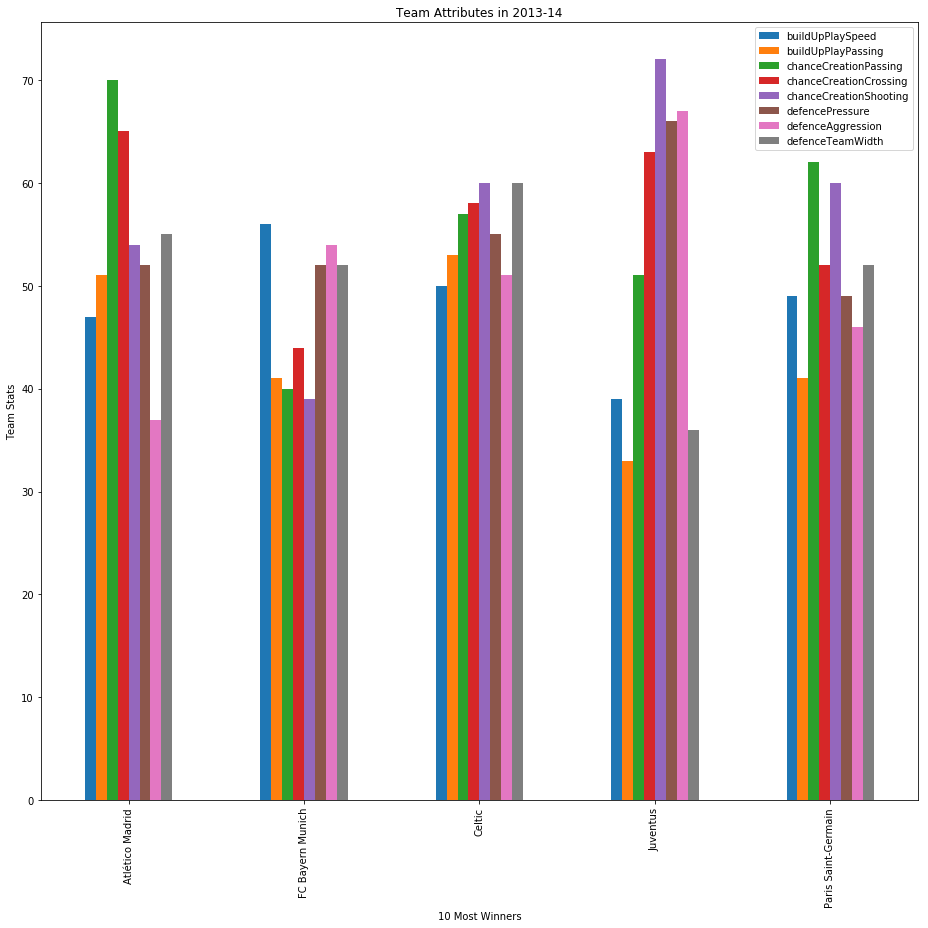

In [60]:
fig, ax = plt.subplots(figsize=(13, 13))

# create a new bar char
ax = winners_stats.plot.bar(ax=ax);

ax.set_xticklabels(winners_stats['team_long_name'], rotation=90)

# Set the y axis label
ax.set_ylabel('Team Stats')

# Set the chart's title
ax.set_title('Team Attributes in 2013-14')

# Set the y axis label 
plt.xlabel("10 Most Winners")

plt.tight_layout();

<a id='conclusions'></a>
## Conclusions

 I came out with some conclusions based on the results of Questions :
 
 1-What teams improved the most over the time period?
   i choose season 2013/2014 , and find out that Juventus club made the most victories in home matches(19) and celtic club made the most victories in away (15) but in total Juventus club made the most victories with 33
   
 2-Which players had the most penalties ?
   figure out that Alessio Cerci had the most penalties with score 4314 and Mario Balotelli with score 4120.0
   
 3-What team had the attributes lead to the most victories in 2013/2014 season?
  figure out that Atlético Madrid came first and FC Bayern Munich next